In [1]:
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

In [2]:
train_data.shape

(50000, 32, 32, 3)

In [3]:
#One-hot encoding
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
#Preprocessing: Standardisation and ZCA
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zca_epsilon=1e-5,
    zca_whitening=True)

E:\Anaconda\lib\site-packages\keras_preprocessing\image\image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [5]:
datagen.fit(train_data)

In [6]:
#Model architecture similar to VGG2016

import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = keras.Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape = (32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
          
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(20, activation='softmax'))

Using TensorFlow backend.


In [7]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

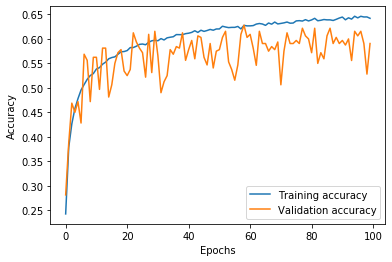

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt

epochs = [i for i in range(100)]

plt.plot(epochs, history.history['accuracy'], label = 'Training accuracy')

plt.plot(epochs, history.history['val_accuracy'], label = 'Validation accuracy')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.savefig('D:\Assignment_2\CNN_loss.png')

In [8]:
#training till epoch 59

history = model.fit(datagen.flow(train_data, train_labels, batch_size=32),
              steps_per_epoch=len(train_data)/ 32, epochs=59,
              validation_data = datagen.flow(test_data, test_labels), validation_steps = 10)

Epoch 1/59
1563/1562 [==============================] - 163s 104ms/step - loss: 2.4393 - accuracy: 0.2449 - val_loss: 1.8183 - val_accuracy: 0.3375
Epoch 2/59
1563/1562 [==============================] - 147s 94ms/step - loss: 1.9731 - accuracy: 0.3835 - val_loss: 1.7767 - val_accuracy: 0.4094
Epoch 3/59
1563/1562 [==============================] - 149s 95ms/step - loss: 1.8100 - accuracy: 0.4339 - val_loss: 1.7718 - val_accuracy: 0.4313
Epoch 4/59
1563/1562 [==============================] - 157s 101ms/step - loss: 1.7162 - accuracy: 0.4597 - val_loss: 2.4886 - val_accuracy: 0.4313
Epoch 5/59
1563/1562 [==============================] - 158s 101ms/step - loss: 1.6482 - accuracy: 0.4825 - val_loss: 1.5211 - val_accuracy: 0.5156
Epoch 6/59
1563/1562 [==============================] - 161s 103ms/step - loss: 1.6019 - accuracy: 0.4968 - val_loss: 1.7769 - val_accuracy: 0.4938
Epoch 7/59
1563/1562 [==============================] - 162s 104ms/step - loss: 1.5558 - accuracy: 0.5116 - val_lo

1563/1562 [==============================] - 164s 105ms/step - loss: 1.1890 - accuracy: 0.6234 - val_loss: 1.6316 - val_accuracy: 0.5562
Epoch 57/59
1563/1562 [==============================] - 164s 105ms/step - loss: 1.1752 - accuracy: 0.6269 - val_loss: 1.6824 - val_accuracy: 0.5719
Epoch 58/59
1563/1562 [==============================] - 163s 104ms/step - loss: 1.1729 - accuracy: 0.6266 - val_loss: 1.5397 - val_accuracy: 0.5688
Epoch 59/59
1563/1562 [==============================] - 163s 104ms/step - loss: 1.1702 - accuracy: 0.6294 - val_loss: 1.3773 - val_accuracy: 0.5906


In [ ]:
folds = []
i = 1

from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)

for data,val in kf.split(train_data):
#datagen.flow(data, labels, batch_size=32)
    print('Fold '+str(i))
    history = model.fit(datagen.flow(train_data[data], train_labels[data], batch_size=32),
              steps_per_epoch=len(data)/ 32, epochs=15,
              validation_data = datagen.flow(train_data[val], train_labels[val]), validation_steps = 10)
    folds.append(history)
    i+=1

In [23]:
import numpy as np
val_accuracy = np.array(history.history['val_accuracy'])
np.where(val_accuracy > 0.628)

(array([58], dtype=int64),)

In [27]:
model.save('D:\Assignment_2\CNN_100epochs')

E:\Anaconda\lib\site-packages\keras\engine\saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [21]:
predictions = model.predict(test_data)

In [26]:
predictions[3]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [20]:
predictions

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [27]:
model.evaluate(test_data, test_labels)

10000/10000 [==============================] - 7s 723us/step


[4756.243298046875, 0.04910000041127205]

In [ ]:
epochs = 100

training_accuracy = []
test_accuracy = []

for e in range(epochs):
    i = 0
    for batch_data, batch_labels in datagen.flow(train_data, train_labels, batch_size=32):
        i += 1
        history = model.fit(batch_data, batch_labels, verbose = 0)
        if(i%200==0):
            print('Epoch '+str(e)+'Batch' +str(i))
        if(i > len(train_data)/32):
            break
            
    model.save('D:\Assignment_2\Models\CNN_'+str(e))
    training_accuracy.append(history.history['accuracy'])
    test_accuracy.append(model.evaluate(test_data, test_labels)[1])
    
    print('Epoch '+e+'\nTraining Accuracy: '+ training_accuracy[e]+'Test Accuracy: '+test_accuracy[e])

Epoch 0Batch200
Epoch 0Batch400
Epoch 0Batch600
Epoch 0Batch800
Epoch 0Batch1000
Epoch 0Batch1200
Epoch 0Batch1400


In [8]:
model.load_weights('D:\Assignment_2\CNN_100epochs')

In [9]:
model.evaluate(test_data, test_labels)

10000/10000 [==============================] - 2s 196us/step


[4350.443046875, 0.0551999993622303]